In [3]:
# импорт библиотек, загрузка набора данных

import numpy as np
import os
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

from find_closest import TFIDFVac, Word2VecVac


DB_NAME = "descriptions2.db"

con = sqlite3.connect(DB_NAME)
tokens_df = pd.read_sql_query("SELECT * FROM hh_tokens", con)
con.close()

In [ ]:
# создание модели счётчика слов
model = CountVectorizer(analyzer='word', stop_words='english')
corpus = tokens_df.tokens.values
X = model.fit_transform(corpus)

In [ ]:
# подготовка результатов к удобному виду
word_list = model.get_feature_names_out()

vfunc = np.vectorize(lambda x: 1 if x>0 else 0)
uncount_list = vfunc(X.toarray()).sum(axis=0)

wcount = list(map(list, zip(word_list, uncount_list)))
wcount.sort(reverse=True, key=lambda x: x[1])
wcount

In [ ]:
# Визуализация частоты встречаемости слов в логарифмической шкале с помощью matplotlib
plt.hist(list(i[1] for i in wcount), bins=100, log=True)
plt.show()

In [ ]:
# Визуализация самых часто встречающихся слов с помощью matplotlib
plt.bar(*list(zip(*wcount[:50])))
plt.xticks(rotation=90)
plt.gcf().set_size_inches(12, 5)
plt.grid(True, axis='y')
plt.show()

In [ ]:
# Визуализация частоты встречаемости слов в логарифмической шкале с помощью seaborn
import seaborn as sns

sns.histplot(list(i[1] for i in wcount), bins=100, log=True)

In [ ]:
' '.join(tokens_df.tokens.values)

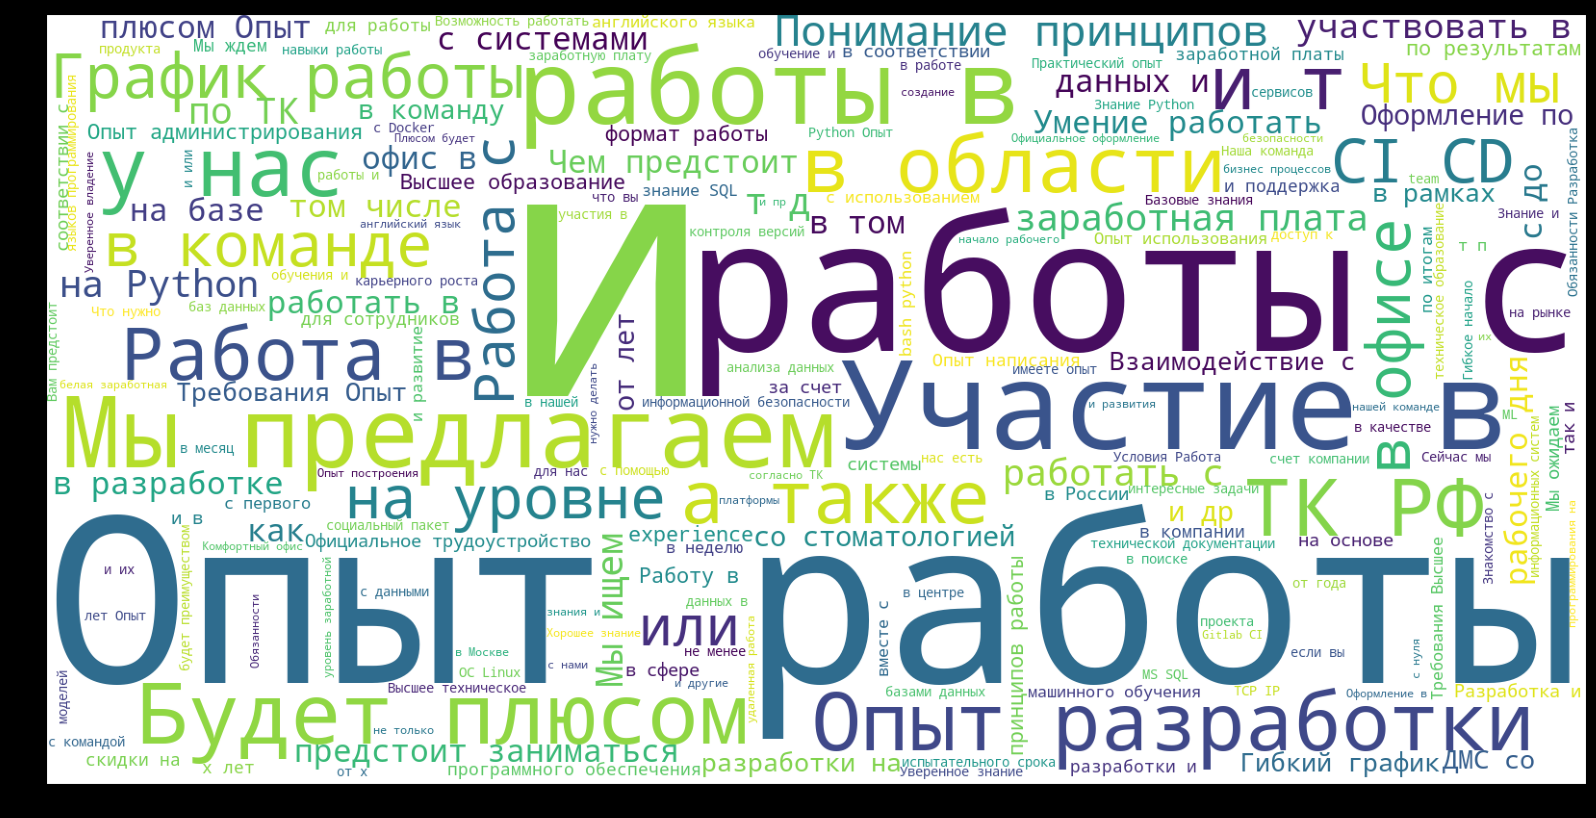

In [8]:
# визуализация в виде облака слов
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(tokens_df.description.values))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

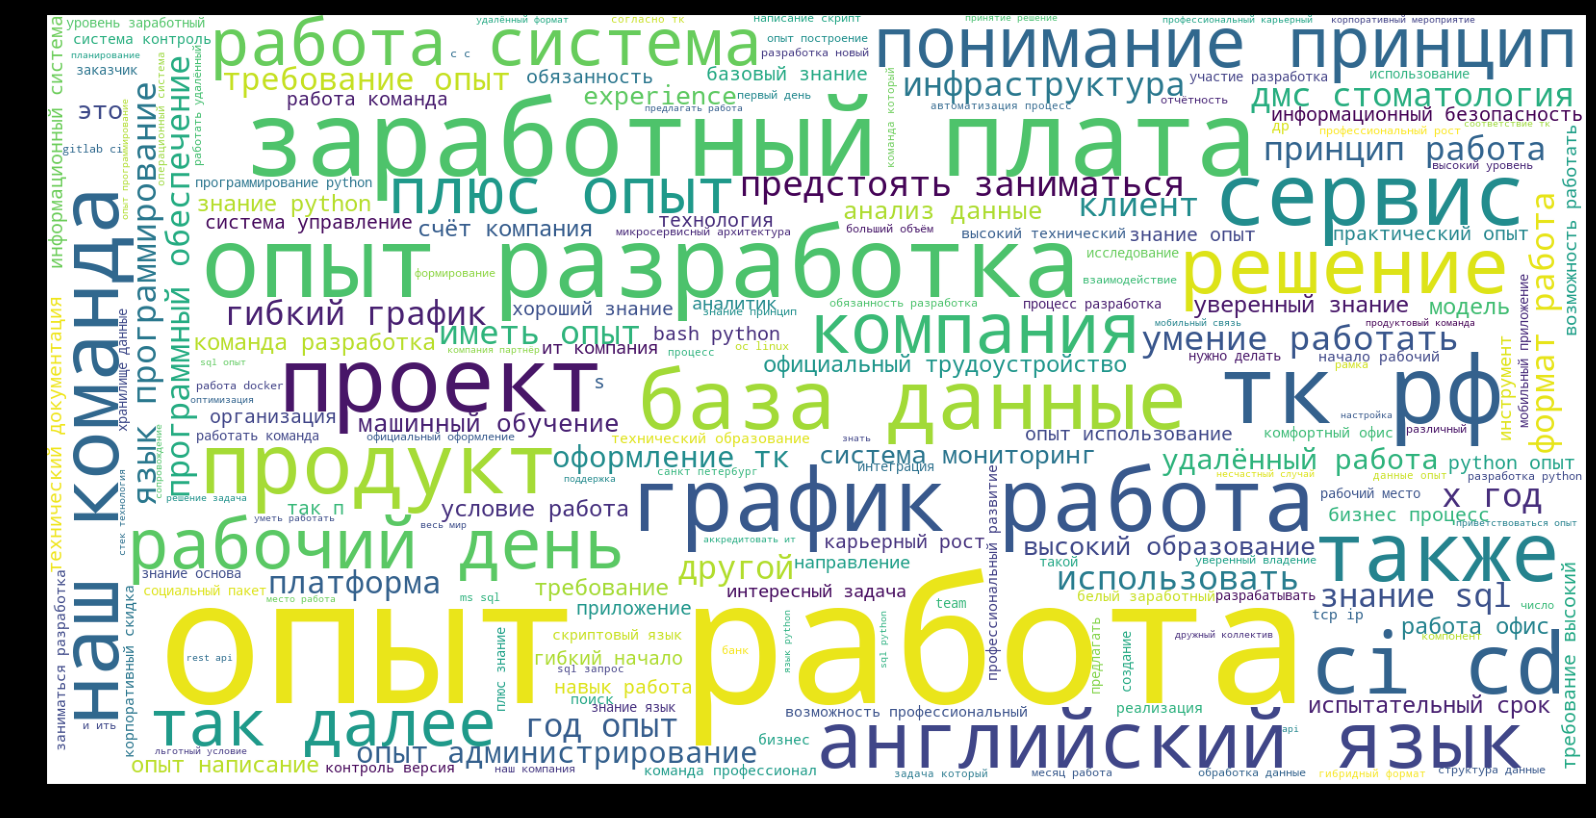

In [9]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(tokens_df.tokens.values))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)